In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('Group_9_data_cleaned.csv', index_col=0)
df.head(10)

,current_1,current_2,current_3,current_4,current_5,current_6,current_7,current_8,current_9,current_10,...,current_40,current_41,current_42,current_43,current_44,current_45,current_46,current_47,current_48,output
0,-3.014600e-07,8.260300e-06,-0.000012,-2.309800e-06,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1
1,2.913200e-06,-5.247700e-06,0.000003,-6.056100e-06,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
2,-2.951700e-06,-3.184000e-06,-0.000016,-1.208400e-06,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1
3,-1.322600e-06,8.820100e-06,-0.000016,-4.811100e-06,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.4975,-1.4976,1
4,-6.836600e-08,5.666300e-07,-0.000026,-6.490100e-06,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.4959,-1.4959,1
5,-9.584900e-07,5.214300e-08,-0.000047,6.453700e-07,-2.304100e-06,0.000055,0.031154,0.031154,0.031201,-0.032789,...,-0.61124,5.8337,17.9893,-1.4956,-1.4956,-1.4956,-1.4973,-1.4972,-1.4973,1
6,-1.783700e-06,1.303600e-06,-0.000038,-7.083900e-06,6.706300e-06,0.000022,0.033805,0.033804,0.033841,-0.033345,...,-0.62501,17.6180,9.0823,-1.4960,-1.4960,-1.4959,-1.4954,-1.4954,-1.4953,1
7,-2.566600e-06,-1.679500e-07,0.000015,-1.598400e-06,8.709200e-07,0.000015,0.031071,0.031071,0.031056,-0.029695,...,-0.63618,12.8380,4.9079,-1.4990,-1.4990,-1.4990,-1.4968,-1.4968,-1.4968,1
8,-5.474000e-06,1.086500e-07,-0.000011,-1.815600e-06,4.757800e-07,0.000024,0.031309,0.031308,0.031319,-0.031344,...,-0.62465,2.9841,6.6883,-1.4955,-1.4955,-1.4955,-1.4947,-1.4947,-1.4947,1
9,2.825600e-06,6.067600e-06,0.000118,-4.347500e-06,1.492300e-06,-0.000003,0.030947,0.030941,0.030823,-0.032171,...,-0.58170,2.0511,8.8939,-1.4963,-1.4963,-1.4963,-1.4943,-1.4943,-1.4943,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58509 entries, 0 to 58508
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   current_1   58509 non-null  float64
 1   current_2   58509 non-null  float64
 2   current_3   58509 non-null  float64
 3   current_4   58509 non-null  float64
 4   current_5   58509 non-null  float64
 5   current_6   58509 non-null  float64
 6   current_7   58509 non-null  float64
 7   current_8   58509 non-null  float64
 8   current_9   58509 non-null  float64
 9   current_10  58509 non-null  float64
 10  current_11  58509 non-null  float64
 11  current_12  58509 non-null  float64
 12  current_13  58509 non-null  float64
 13  current_14  58509 non-null  float64
 14  current_15  58509 non-null  float64
 15  current_16  58509 non-null  float64
 16  current_17  58509 non-null  float64
 17  current_18  58509 non-null  float64
 18  current_19  58509 non-null  float64
 19  current_20  58509 non-nul

In [4]:
X = df.drop(["output"], axis=1)
X

,current_1,current_2,current_3,current_4,current_5,current_6,current_7,current_8,current_9,current_10,...,current_39,current_40,current_41,current_42,current_43,current_44,current_45,current_46,current_47,current_48
0,-3.014600e-07,8.260300e-06,-0.000012,-0.000002,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,6.01680,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.49960,-1.49960
1,2.913200e-06,-5.247700e-06,0.000003,-0.000006,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,3.60480,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.50050,-1.50050
2,-2.951700e-06,-3.184000e-06,-0.000016,-0.000001,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,5.80070,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.49850,-1.49850
3,-1.322600e-06,8.820100e-06,-0.000016,-0.000005,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,18.20455,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.49750,-1.49760
4,-6.836600e-08,5.666300e-07,-0.000026,-0.000006,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,5.05820,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.49590,-1.49590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58504,-9.982500e-06,1.854900e-06,-0.000021,0.000017,-5.910200e-06,-0.000098,-0.083417,-0.083419,-0.083398,-0.111281,...,7.39390,-0.52907,1.4641,7.0032,-1.5024,-1.5025,-1.5023,-1.4933,-1.49330,-1.49330
58505,-1.055400e-05,1.983500e-05,0.000031,-0.000018,-6.547550e-05,0.000289,-0.085131,-0.085151,-0.085182,-0.111281,...,3.85500,-0.51971,3.3275,2.3072,-1.5024,-1.5025,-1.5024,-1.4925,-1.49250,-1.49260
58506,-5.857700e-06,1.859400e-05,-0.000102,-0.000003,3.827500e-06,0.000117,-0.081989,-0.082008,-0.081906,-0.111281,...,12.69400,-0.51103,18.5458,9.0437,-1.5035,-1.5035,-1.5039,-1.4911,-1.49135,-1.49125
58507,-4.441100e-06,3.396900e-05,-0.000294,0.000005,6.500800e-06,0.000087,-0.081500,-0.081534,-0.081093,-0.111281,...,4.39240,-0.52033,1.3890,10.7430,-1.5029,-1.5029,-1.5030,-1.4932,-1.49320,-1.49310


In [5]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

In [6]:
km = KMeans(n_clusters= 11)
km.fit(X)

KMeans(n_clusters=11)

In [7]:
cluster = km.predict(X)
cluster

array([ 3,  5,  3, ..., 10,  0,  3])

In [8]:
X['Cluster'] = cluster
X

,current_1,current_2,current_3,current_4,current_5,current_6,current_7,current_8,current_9,current_10,...,current_40,current_41,current_42,current_43,current_44,current_45,current_46,current_47,current_48,Cluster
0,-3.014600e-07,8.260300e-06,-0.000012,-0.000002,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.49960,-1.49960,3
1,2.913200e-06,-5.247700e-06,0.000003,-0.000006,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.50050,-1.50050,5
2,-2.951700e-06,-3.184000e-06,-0.000016,-0.000001,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.49850,-1.49850,3
3,-1.322600e-06,8.820100e-06,-0.000016,-0.000005,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.49750,-1.49760,6
4,-6.836600e-08,5.666300e-07,-0.000026,-0.000006,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.49590,-1.49590,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58504,-9.982500e-06,1.854900e-06,-0.000021,0.000017,-5.910200e-06,-0.000098,-0.083417,-0.083419,-0.083398,-0.111281,...,-0.52907,1.4641,7.0032,-1.5024,-1.5025,-1.5023,-1.4933,-1.49330,-1.49330,9
58505,-1.055400e-05,1.983500e-05,0.000031,-0.000018,-6.547550e-05,0.000289,-0.085131,-0.085151,-0.085182,-0.111281,...,-0.51971,3.3275,2.3072,-1.5024,-1.5025,-1.5024,-1.4925,-1.49250,-1.49260,3
58506,-5.857700e-06,1.859400e-05,-0.000102,-0.000003,3.827500e-06,0.000117,-0.081989,-0.082008,-0.081906,-0.111281,...,-0.51103,18.5458,9.0437,-1.5035,-1.5035,-1.5039,-1.4911,-1.49135,-1.49125,10
58507,-4.441100e-06,3.396900e-05,-0.000294,0.000005,6.500800e-06,0.000087,-0.081500,-0.081534,-0.081093,-0.111281,...,-0.52033,1.3890,10.7430,-1.5029,-1.5029,-1.5030,-1.4932,-1.49320,-1.49310,0


In [9]:
c = X.drop(columns=['Cluster'])
c

,current_1,current_2,current_3,current_4,current_5,current_6,current_7,current_8,current_9,current_10,...,current_39,current_40,current_41,current_42,current_43,current_44,current_45,current_46,current_47,current_48
0,-3.014600e-07,8.260300e-06,-0.000012,-0.000002,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,6.01680,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.49960,-1.49960
1,2.913200e-06,-5.247700e-06,0.000003,-0.000006,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,3.60480,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.50050,-1.50050
2,-2.951700e-06,-3.184000e-06,-0.000016,-0.000001,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,5.80070,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.49850,-1.49850
3,-1.322600e-06,8.820100e-06,-0.000016,-0.000005,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,18.20455,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.49750,-1.49760
4,-6.836600e-08,5.666300e-07,-0.000026,-0.000006,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,5.05820,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.49590,-1.49590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58504,-9.982500e-06,1.854900e-06,-0.000021,0.000017,-5.910200e-06,-0.000098,-0.083417,-0.083419,-0.083398,-0.111281,...,7.39390,-0.52907,1.4641,7.0032,-1.5024,-1.5025,-1.5023,-1.4933,-1.49330,-1.49330
58505,-1.055400e-05,1.983500e-05,0.000031,-0.000018,-6.547550e-05,0.000289,-0.085131,-0.085151,-0.085182,-0.111281,...,3.85500,-0.51971,3.3275,2.3072,-1.5024,-1.5025,-1.5024,-1.4925,-1.49250,-1.49260
58506,-5.857700e-06,1.859400e-05,-0.000102,-0.000003,3.827500e-06,0.000117,-0.081989,-0.082008,-0.081906,-0.111281,...,12.69400,-0.51103,18.5458,9.0437,-1.5035,-1.5035,-1.5039,-1.4911,-1.49135,-1.49125
58507,-4.441100e-06,3.396900e-05,-0.000294,0.000005,6.500800e-06,0.000087,-0.081500,-0.081534,-0.081093,-0.111281,...,4.39240,-0.52033,1.3890,10.7430,-1.5029,-1.5029,-1.5030,-1.4932,-1.49320,-1.49310


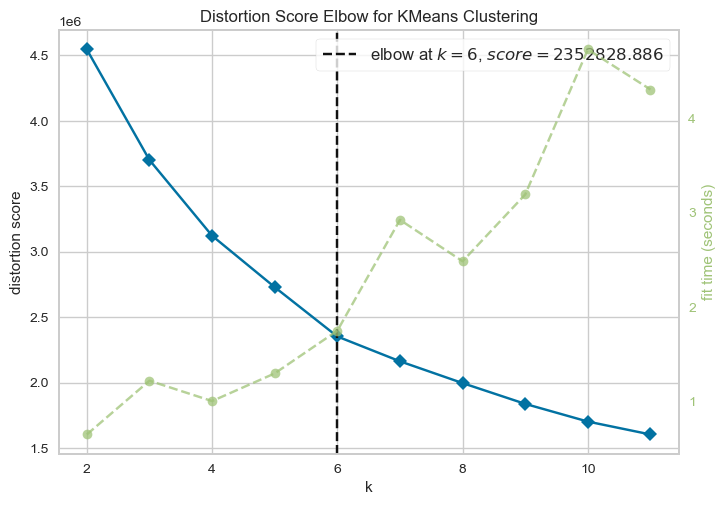

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,12))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### The number of clusters should be taken is 6 from elbow method.

### Now considering all features.

In [11]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)

In [12]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, ..., 0, 5, 1])

In [13]:
X['Cluster'] = y_kmeans
X.head()

,current_1,current_2,current_3,current_4,current_5,current_6,current_7,current_8,current_9,current_10,...,current_40,current_41,current_42,current_43,current_44,current_45,current_46,current_47,current_48,Cluster
0,-3.014600e-07,8.260300e-06,-0.000012,-0.000002,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1
1,2.913200e-06,-5.247700e-06,0.000003,-0.000006,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
2,-2.951700e-06,-3.184000e-06,-0.000016,-0.000001,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1
3,-1.322600e-06,8.820100e-06,-0.000016,-0.000005,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.4975,-1.4976,3
4,-6.836600e-08,5.666300e-07,-0.000026,-0.000006,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.4959,-1.4959,4


<AxesSubplot:>

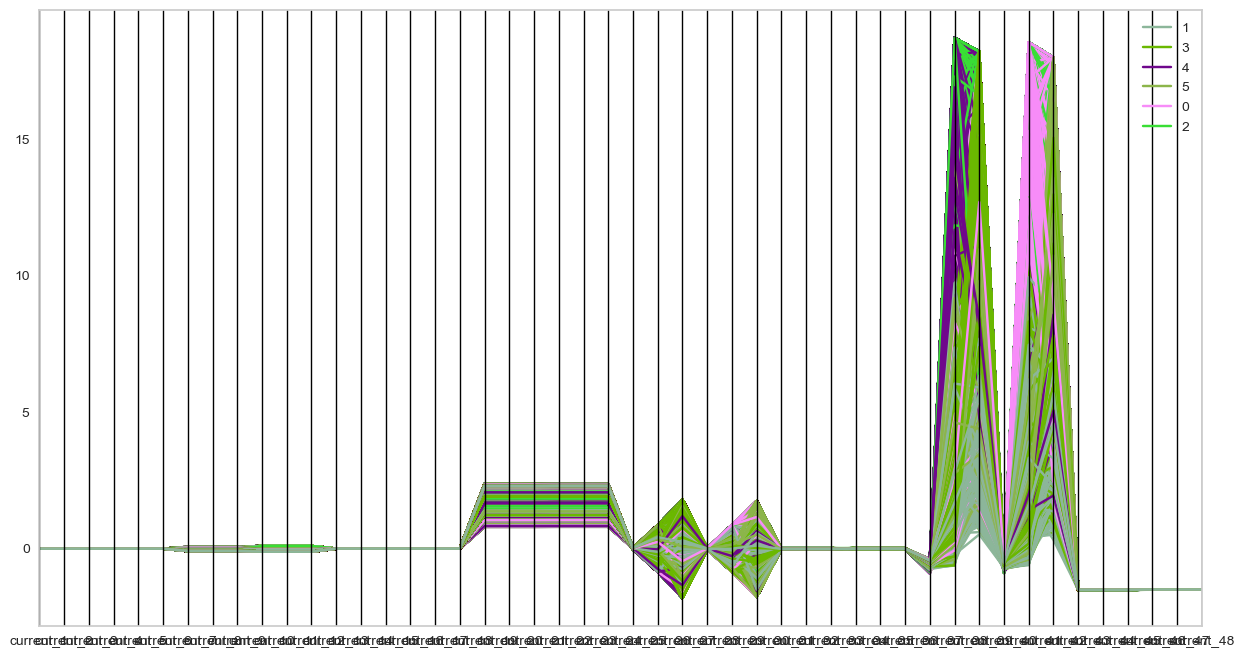

In [14]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,8))

parallel_coordinates(X, 'Cluster')

In [15]:
kmeans.inertia_

2352828.848270837

In [16]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(c)
cluster_labels = kmeans.labels_

In [17]:
kmeans.transform(c)

array([[ 5.85244009, 12.4654198 ,  4.12215754, 18.89637514,  8.5412453 ,
        13.33936151],
       [ 9.24795191, 16.2423099 ,  5.92402573, 19.6110294 , 11.67836837,
        10.69776055],
       [ 8.56268824, 14.35971485,  1.95790439, 20.71766039,  8.93000555,
        14.1312862 ],
       ...,
       [16.90095634, 19.68652385, 18.31637692, 14.22844623, 15.032747  ,
         5.81208111],
       [ 4.62946331, 13.18429027,  6.43710972, 20.07564362, 10.97810705,
        15.27536104],
       [ 9.45376792, 14.75928308,  2.14532442, 21.69661101,  9.46208588,
        15.42198483]])

In [18]:
silhouette_samples(c, kmeans.labels_)

array([0.25913238, 0.32594093, 0.53651251, ..., 0.42618015, 0.06502358,
       0.56693479])

In [19]:
silhouette_score(c, kmeans.labels_)

0.3092265001711981

In [20]:
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = 6).fit(c)
    sil.append(silhouette_score(c, kmeans.labels_, metric = 'euclidean'))

In [21]:
sil

[0.30924647610245315,
 0.3092279965653399,
 0.3091901325435946,
 0.30923428222369354,
 0.3092330437379611,
 0.3092188831084062,
 0.30922540960039624,
 0.3092282609131252,
 0.3092279965653399]

Text(0, 0.5, 'Silhouette Score')

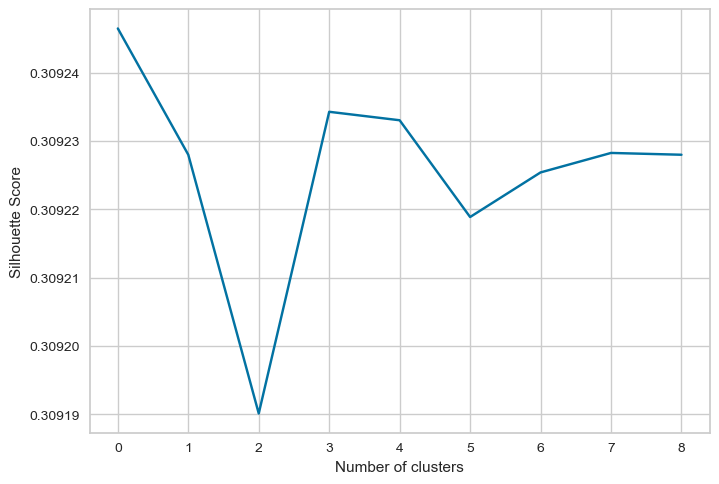

In [22]:
plt.plot(sil)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

### Clustering using only two features from Bidirectional Elimination.

In [23]:
df.columns

Index(['current_1', 'current_2', 'current_3', 'current_4', 'current_5',
       'current_6', 'current_7', 'current_8', 'current_9', 'current_10',
       'current_11', 'current_12', 'current_13', 'current_14', 'current_15',
       'current_16', 'current_17', 'current_18', 'current_19', 'current_20',
       'current_21', 'current_22', 'current_23', 'current_24', 'current_25',
       'current_26', 'current_27', 'current_28', 'current_29', 'current_30',
       'current_31', 'current_32', 'current_33', 'current_34', 'current_35',
       'current_36', 'current_37', 'current_38', 'current_39', 'current_40',
       'current_41', 'current_42', 'current_43', 'current_44', 'current_45',
       'current_46', 'current_47', 'current_48', 'output'],
      dtype='object')

In [24]:
X1 = df[['current_1', 'current_20']]
X1

,current_1,current_20
0,-3.014600e-07,0.89669
1,2.913200e-06,0.89583
2,-2.951700e-06,0.89583
3,-1.322600e-06,0.89481
4,-6.836600e-08,0.89656
...,...,...
58504,-9.982500e-06,2.29090
58505,-1.055400e-05,2.29200
58506,-5.857700e-06,2.29070
58507,-4.441100e-06,2.29040


In [25]:
df_1 = X1

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model=scaler.fit(df_1[['current_1']])
df_1['current_1']=model.transform(df_1[['current_1']])
scaler = MinMaxScaler()
mol = scaler.fit(df_1[['current_20']])
df_1['current_20'] = mol.transform(df_1[['current_20']])

C:\Users\Mohith Varma\AppData\Local\Temp\ipykernel_35356\3527785687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['current_1']=model.transform(df_1[['current_1']])
C:\Users\Mohith Varma\AppData\Local\Temp\ipykernel_35356\3527785687.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['current_20'] = mol.transform(df_1[['current_20']])


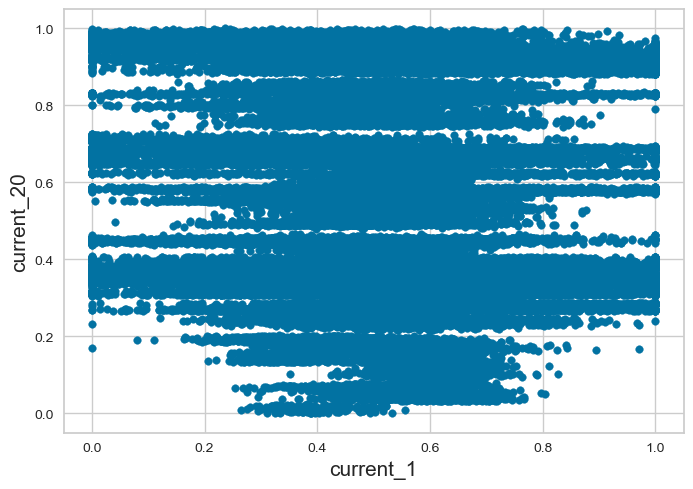

In [27]:
plt.scatter(df_1['current_1'], df_1['current_20'], s=30)
plt.xlabel('current_1', fontsize=15)
plt.ylabel('current_20', fontsize=15);

In [28]:
X1 = df_1

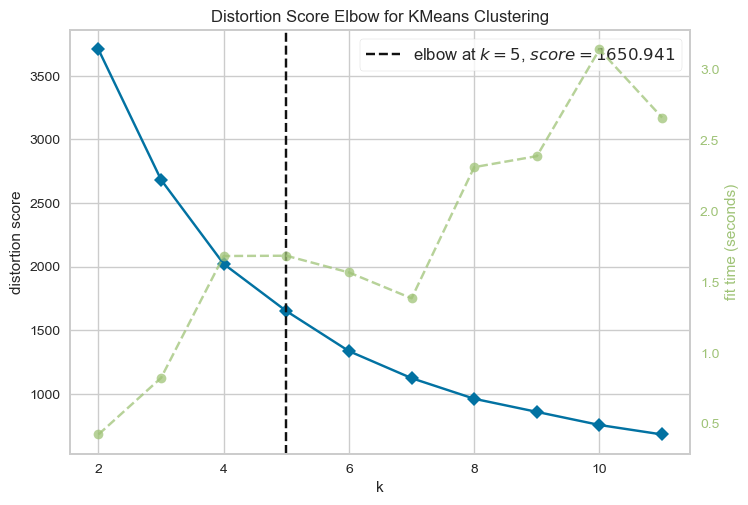

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,12))
 
visualizer.fit(X1)        # Fit the data to the visualizer
visualizer.show()   

In [30]:
### From Elbow Plot it is recommending to take 5 clusters

In [31]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X1)

In [32]:
cluster = kmeans.predict(X1)
cluster

array([1, 1, 1, ..., 0, 0, 0])

In [33]:
df['Cluster'] = cluster
df

,current_1,current_2,current_3,current_4,current_5,current_6,current_7,current_8,current_9,current_10,...,current_41,current_42,current_43,current_44,current_45,current_46,current_47,current_48,output,Cluster
0,-3.014600e-07,8.260300e-06,-0.000012,-0.000002,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.49960,-1.49960,1,1
1,2.913200e-06,-5.247700e-06,0.000003,-0.000006,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.50050,-1.50050,1,1
2,-2.951700e-06,-3.184000e-06,-0.000016,-0.000001,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.49850,-1.49850,1,1
3,-1.322600e-06,8.820100e-06,-0.000016,-0.000005,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.49750,-1.49760,1,1
4,-6.836600e-08,5.666300e-07,-0.000026,-0.000006,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.49590,-1.49590,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58504,-9.982500e-06,1.854900e-06,-0.000021,0.000017,-5.910200e-06,-0.000098,-0.083417,-0.083419,-0.083398,-0.111281,...,1.4641,7.0032,-1.5024,-1.5025,-1.5023,-1.4933,-1.49330,-1.49330,11,0
58505,-1.055400e-05,1.983500e-05,0.000031,-0.000018,-6.547550e-05,0.000289,-0.085131,-0.085151,-0.085182,-0.111281,...,3.3275,2.3072,-1.5024,-1.5025,-1.5024,-1.4925,-1.49250,-1.49260,11,0
58506,-5.857700e-06,1.859400e-05,-0.000102,-0.000003,3.827500e-06,0.000117,-0.081989,-0.082008,-0.081906,-0.111281,...,18.5458,9.0437,-1.5035,-1.5035,-1.5039,-1.4911,-1.49135,-1.49125,11,0
58507,-4.441100e-06,3.396900e-05,-0.000294,0.000005,6.500800e-06,0.000087,-0.081500,-0.081534,-0.081093,-0.111281,...,1.3890,10.7430,-1.5029,-1.5029,-1.5030,-1.4932,-1.49320,-1.49310,11,0


In [34]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [35]:
kmeans.cluster_centers_

array([[0.25063677, 0.84035916],
       [0.63593777, 0.27805355],
       [0.30357391, 0.33614861],
       [0.51730891, 0.60930134],
       [0.7419725 , 0.82215811]])

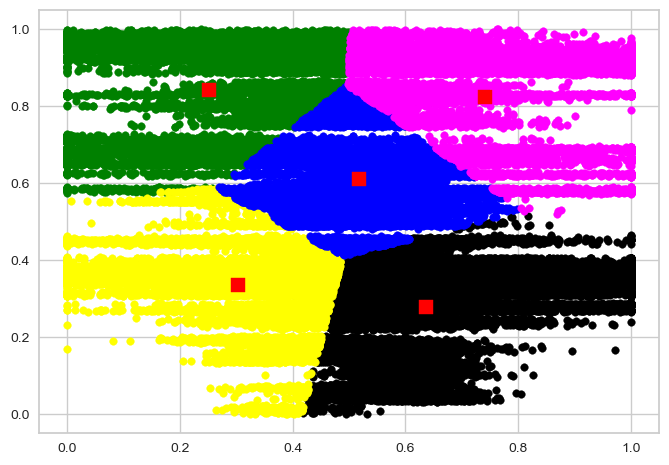

In [36]:
labels = [0, 1, 2, 3, 4]
colors = ["green", "black", "yellow", "blue", "magenta"]

for label, color in zip(labels, colors):
    index = df["Cluster"]==label
    plt.scatter(df_1.loc[index, "current_1"],
                df_1.loc[index, "current_20"],
                c = color,
                s=30)
    
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="red", marker="s", s=100);

In [37]:
kmeans.inertia_

1650.9380713806509

In [38]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(c)
cluster_labels = kmeans.labels_

In [39]:
kmeans.transform(c)

array([[18.84708105,  3.88703141,  6.22011148, 12.98817052, 12.20439466],
       [19.5485878 ,  5.90555504, 10.1022052 , 10.42675673, 16.01898705],
       [20.6608799 ,  1.94598343,  7.99312894, 13.81987455, 14.1125939 ],
       ...,
       [14.18101363, 18.23329788, 15.0631544 ,  5.9971722 , 19.50932686],
       [20.03550867,  6.16809827,  7.58548474, 14.90413867, 12.93973708],
       [21.64013808,  2.23254289,  8.81023749, 15.11726838, 14.52040956]])

In [40]:
silhouette_samples(c, kmeans.labels_)

array([0.37251465, 0.40698104, 0.54426892, ..., 0.41287598, 0.26784047,
       0.56431731])

In [41]:
silhouette_score(c, kmeans.labels_)

0.3118071642990055

In [43]:
cd = c[["current_1", "current_20"]]
cd

,current_1,current_20
0,-3.014600e-07,0.89669
1,2.913200e-06,0.89583
2,-2.951700e-06,0.89583
3,-1.322600e-06,0.89481
4,-6.836600e-08,0.89656
...,...,...
58504,-9.982500e-06,2.29090
58505,-1.055400e-05,2.29200
58506,-5.857700e-06,2.29070
58507,-4.441100e-06,2.29040


In [ ]:
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = 5).fit(cd)
    sil.append(silhouette_score(cd, kmeans.labels_, metric = 'euclidean'))

In [ ]:
import warnings
warnings.filterwarnings("ignore")

! pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
visualizer = SilhouetteVisualizer(km)
visualizer.fit(cd);

In [ ]:
inertia = []

for k in range(1,16):
    km = KMeans(n_clusters=5)
    km.fit(cd)
    inertia.append(km.inertia_)

In [ ]:
inertia

In [ ]:
plt.plot(range(1,16), inertia)
plt.xlabel('K', fontsize=15)
plt.ylabel('inertia', fontsize=15);

In [ ]:
fig, ax = plt.subplots(6, 2, figsize=(15,8))
for k in range(2,12):

    km = KMeans(n_clusters=6)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(km, ax=ax[q-1][mod])
    visualizer.fit(cd)